In [ ]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.datasets import cifar10
import seaborn as sns

# Cargar el conjunto de datos CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


In [ ]:
# Preprocesar los datos: aplanar las imágenes de 32x32x3 a un vector de 3072 dimensiones (32*32*3)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalizar los datos a un rango entre 0 y 1
X_train_flat = X_train_flat / 255.0
X_test_flat = X_test_flat / 255.0

# Crear el clasificador k-NN
k = 5  # Número de vecinos más cercanos
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el clasificador
knn.fit(X_train_flat, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test_flat)

# Evaluar el rendimiento del clasificador
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del clasificador k-NN: {accuracy * 100:.2f}%")



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Precisión del clasificador k-NN: 33.98%


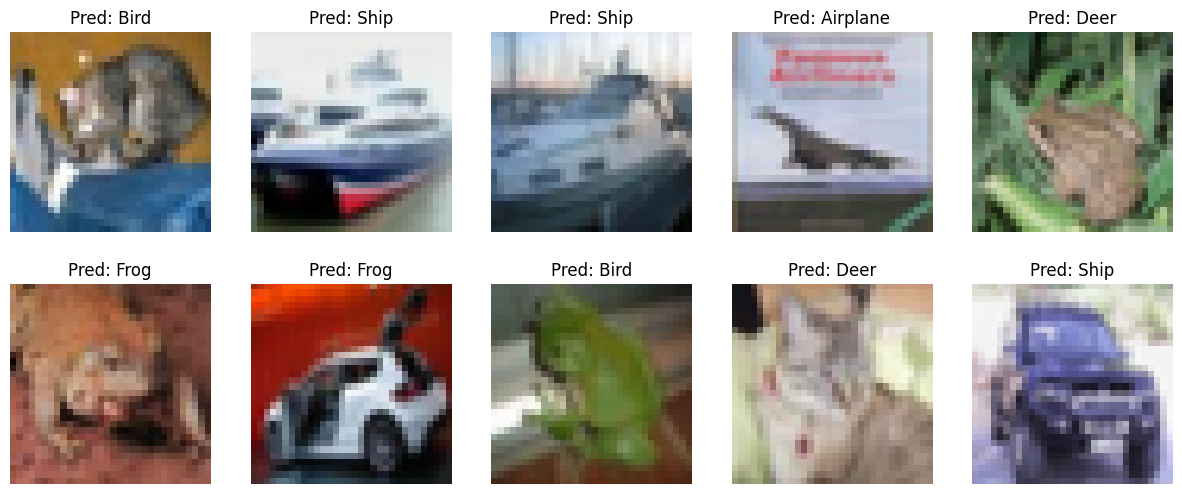

In [ ]:
# Mostrar algunas imágenes de prueba y sus predicciones
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Etiquetas de las clases del CIFAR-10
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Mostrar las primeras 10 imágenes y sus etiquetas predichas
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    ax.set_title(f"Pred: {labels[y_pred[i]]}")  # Accedemos a la clase directamente
    ax.axis('off')

plt.show()
